# AI Project

### Group 6:
- AYOUB Simon
- GUG Maxime
- HOOG Cédric
- LANTZ Florian
- RINALDI Johan

## Context

## 1. Data handling & preparation

### 1.1. Data loading & merging

Our employees information dataset composed of 3 files:
- `employee_survey_data.csv`
- `general_data.csv`
- `manager_survey_data.csv`

Given that there is a common column in the 3 files, we will merge them into a single dataframe to facilitate the analysis.

In [2]:
import pandas as pd
import numpy as np
import os

# Set the project root directory (Compatibility fix for Jupyter on linux)
pwd = !pwd
projectRoot = os.path.abspath(os.path.join(pwd[0], "..")) 

employee_survey_data = pd.read_csv(os.path.join(projectRoot, 'datasets', 'employee_survey_data.csv'))
general_data = pd.read_csv(os.path.join(projectRoot, 'datasets', 'general_data.csv'))
manager_survey_data = pd.read_csv(os.path.join(projectRoot, 'datasets', 'manager_survey_data.csv'))

data = pd.merge(employee_survey_data, general_data, on='EmployeeID')
data = pd.merge(data, manager_survey_data, on='EmployeeID')

data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


We also have 2 additional files that keep track of the employees' presence:
- `in_time.csv`
- `out_time.csv`

However, for these datasets, we need a bit more processing to be able to merge them with the main dataset.

We will load the following datasets:
- `in_time.csv`
- `out_time.csv`

These datasets contain the timestamps of the employees' arrival and leave time.

We therefore need to extract the hour of arrival and the hour of departure from the timestamps and normalize it to be between 0 and 1.

We will then calculate from each dataset the mean arrival time and mean leave time, the arrival time standard deviation (consistency) as well as the number of days absent for each employee.

These informations will be added to the dataset after their processing.

The structure of the dataset IN / OUT dataset is currently as follows (reduced in size to give as an example):

| Employee ID  | "2015-01-15           | "2015-01-16"          | ... |
|--------------|-----------------------|-----------------------|-----|
| 1            | NA                    | "2015-01-16 10:19:08" | ... |
| 2            | "2015-01-15 10:19:08" | "2015-01-16 10:19:08" | ... |
| ...          | ...                   | ...                   | ... |

In [3]:
in_time = pd.read_csv(os.path.join(projectRoot, 'datasets', 'in_time.csv'))
out_time = pd.read_csv(os.path.join(projectRoot, 'datasets', 'out_time.csv'))

# Convert the timestamps to datetime
in_time = in_time.apply(pd.to_datetime)
out_time = out_time.apply(pd.to_datetime)

# Calculate the arrival time and leave time
in_time = in_time.apply(lambda x: x.dt.hour + x.dt.minute / 60)
out_time = out_time.apply(lambda x: x.dt.hour + x.dt.minute / 60)

# Calculate the mean arrival time and mean leave time
data['MeanArrivalTime'] = in_time.mean(axis=1)
data['MeanLeaveTime'] = out_time.mean(axis=1)

# Calculate the standard deviation of arrival time
data['ArrivalTimeConsistency'] = in_time.std(axis=1)

# Calculate the number of days absent
data['DaysAbsent'] = in_time.isna().sum(axis=1)

data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanArrivalTime,MeanLeaveTime,ArrivalTimeConsistency,DaysAbsent
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,6,1,0,0,3,3,9.950143,17.292632,0.703632,29
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,3,5,1,4,2,4,9.938608,17.623769,0.711236,25
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,2,5,0,3,3,3,9.975377,16.960014,0.697744,19
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,5,8,7,5,2,3,9.931568,17.094562,0.707899,26
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,2,6,0,4,3,3,9.949458,17.923171,0.691928,16


### 1.2. Handling useless data

In this step, we will remove the columns that are not relevant to the analysis.
We will remove the following columns because their value is the same throughout the dataset:
- `EmployeeCount`
- `Over18`
- `StandardHours`

We will also remove the `EmployeeID` as well because it is not relevant to the analysis anymore as it was only used as a key to merge the datasets.

In [4]:
data = data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID'])

### 1.3. Ethical considerations

We will do a model without ethical values. So, we will not deleted the columns that has been drop for the Ethic. 

In [5]:
data.isnull().sum()

EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
MeanArrivalTime             0
MeanLeaveTime               0
ArrivalTimeConsistency      0
DaysAbsent                  0
dtype: int64

We can see that 5 columns have missing values:
- `EnvironmentSatisfaction`
- `JobSatisfaction`
- `WorkLifeBalance`
- `NumCompaniesWorked`
- `TotalWorkingYears`

These values all come from the employee survey data, so we can assume that some employees didn't answer the survey.

Given that this data is numerical, we will fill the missing values with the median of the column.

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

data[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked', 'TotalWorkingYears']] = imputer.fit_transform(data[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked', 'TotalWorkingYears']])

data.isnull().sum()

EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
MeanArrivalTime            0
MeanLeaveTime              0
ArrivalTimeConsistency     0
DaysAbsent                 0
dtype: int64

Now that we have filled the missing values, we can move on to the next step.

### 1.5. Handling categorical data
In this step, we will transform the categorical data into numerical data. This will allow us to use the data in machine learning models.

First, we need to list the categorical columns.

In [7]:
data.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus'],
      dtype='object')

Then we'll analyze the unique values of each column to see if we can transform them into numerical data.

In [8]:
for column in data.select_dtypes(include=['object']).columns:
    print(column, data[column].unique())

Attrition ['No' 'Yes']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
MaritalStatus ['Married' 'Single' 'Divorced']


We can see that the following columns can be transformed into numerical data:
- `Attrition`
- `BusinessTravel`
- `Department`
- `EducationField`
- `JobRole`
- `Gender`
- `MaritalStatus`

We will use `sklearn` encoders to transform the data.
Given that we have both data for which order is important and data for which order is not important, we will use both `OrdinalEncoder` and `OneHotEncoder`. We will use `OrdinalEncoder` for the data for which order is important, therefore associating a numerical value to each unique value. We will use `OneHotEncoder` for the data for which order is not important, therefore creating new binary columns for each unique value.

The following columns will be transformed using `OrdinalEncoder`:
- `Attrition`
- `BusinessTravel`
- `Gender`

The following columns will be transformed using `OneHotEncoder`:
- `Department`
- `EducationField`
- `JobRole`
- `MaritalStatus`

In [9]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Create the encoders
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False) 

# Transform the ordinal data 
ordinal_columns = ['Attrition', 'BusinessTravel', 'Gender']
data[ordinal_columns] = ordinal_encoder.fit_transform(data[ordinal_columns])

# Transform the onehot data
onehot_columns = ['Department', 'EducationField', 'JobRole','MaritalStatus']
onehot_data = onehot_encoder.fit_transform(data[onehot_columns])
onehot_data = pd.DataFrame(onehot_data, columns=onehot_encoder.get_feature_names_out(onehot_columns))
data = pd.concat([data, onehot_data], axis=1)
data = data.drop(columns=onehot_columns)

data.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,DistanceFromHome,Education,Gender,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,3.0,4.0,2.0,51,0.0,2.0,6,2,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,2.0,4.0,31,1.0,1.0,10,1,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2.0,1.0,32,0.0,1.0,17,4,1.0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,4.0,3.0,38,0.0,0.0,2,5,1.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,1.0,3.0,32,0.0,2.0,10,1,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### 1.6. Data normalization

In this step, we will normalize the data to ensure that the data is on the same scale. This will allow us to use the data in machine learning models.
Therefore, all the values will be between 0 and 1.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,DistanceFromHome,Education,Gender,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.666667,1.000000,0.333333,0.785714,0.0,1.0,0.178571,0.25,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.666667,0.333333,1.000000,0.309524,1.0,0.5,0.321429,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.333333,0.000000,0.333333,0.0,0.5,0.571429,0.75,1.0,0.75,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.000000,1.000000,0.666667,0.476190,0.0,0.0,0.035714,1.00,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.000000,0.000000,0.666667,0.333333,0.0,1.0,0.321429,0.00,1.0,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 2. Data analysis

Now that we have all of our data prepared, we can start the analysis.

### 2.1 Correlation matrix

First, we will calculate the correlation matrix to see the relationships between the different columns.

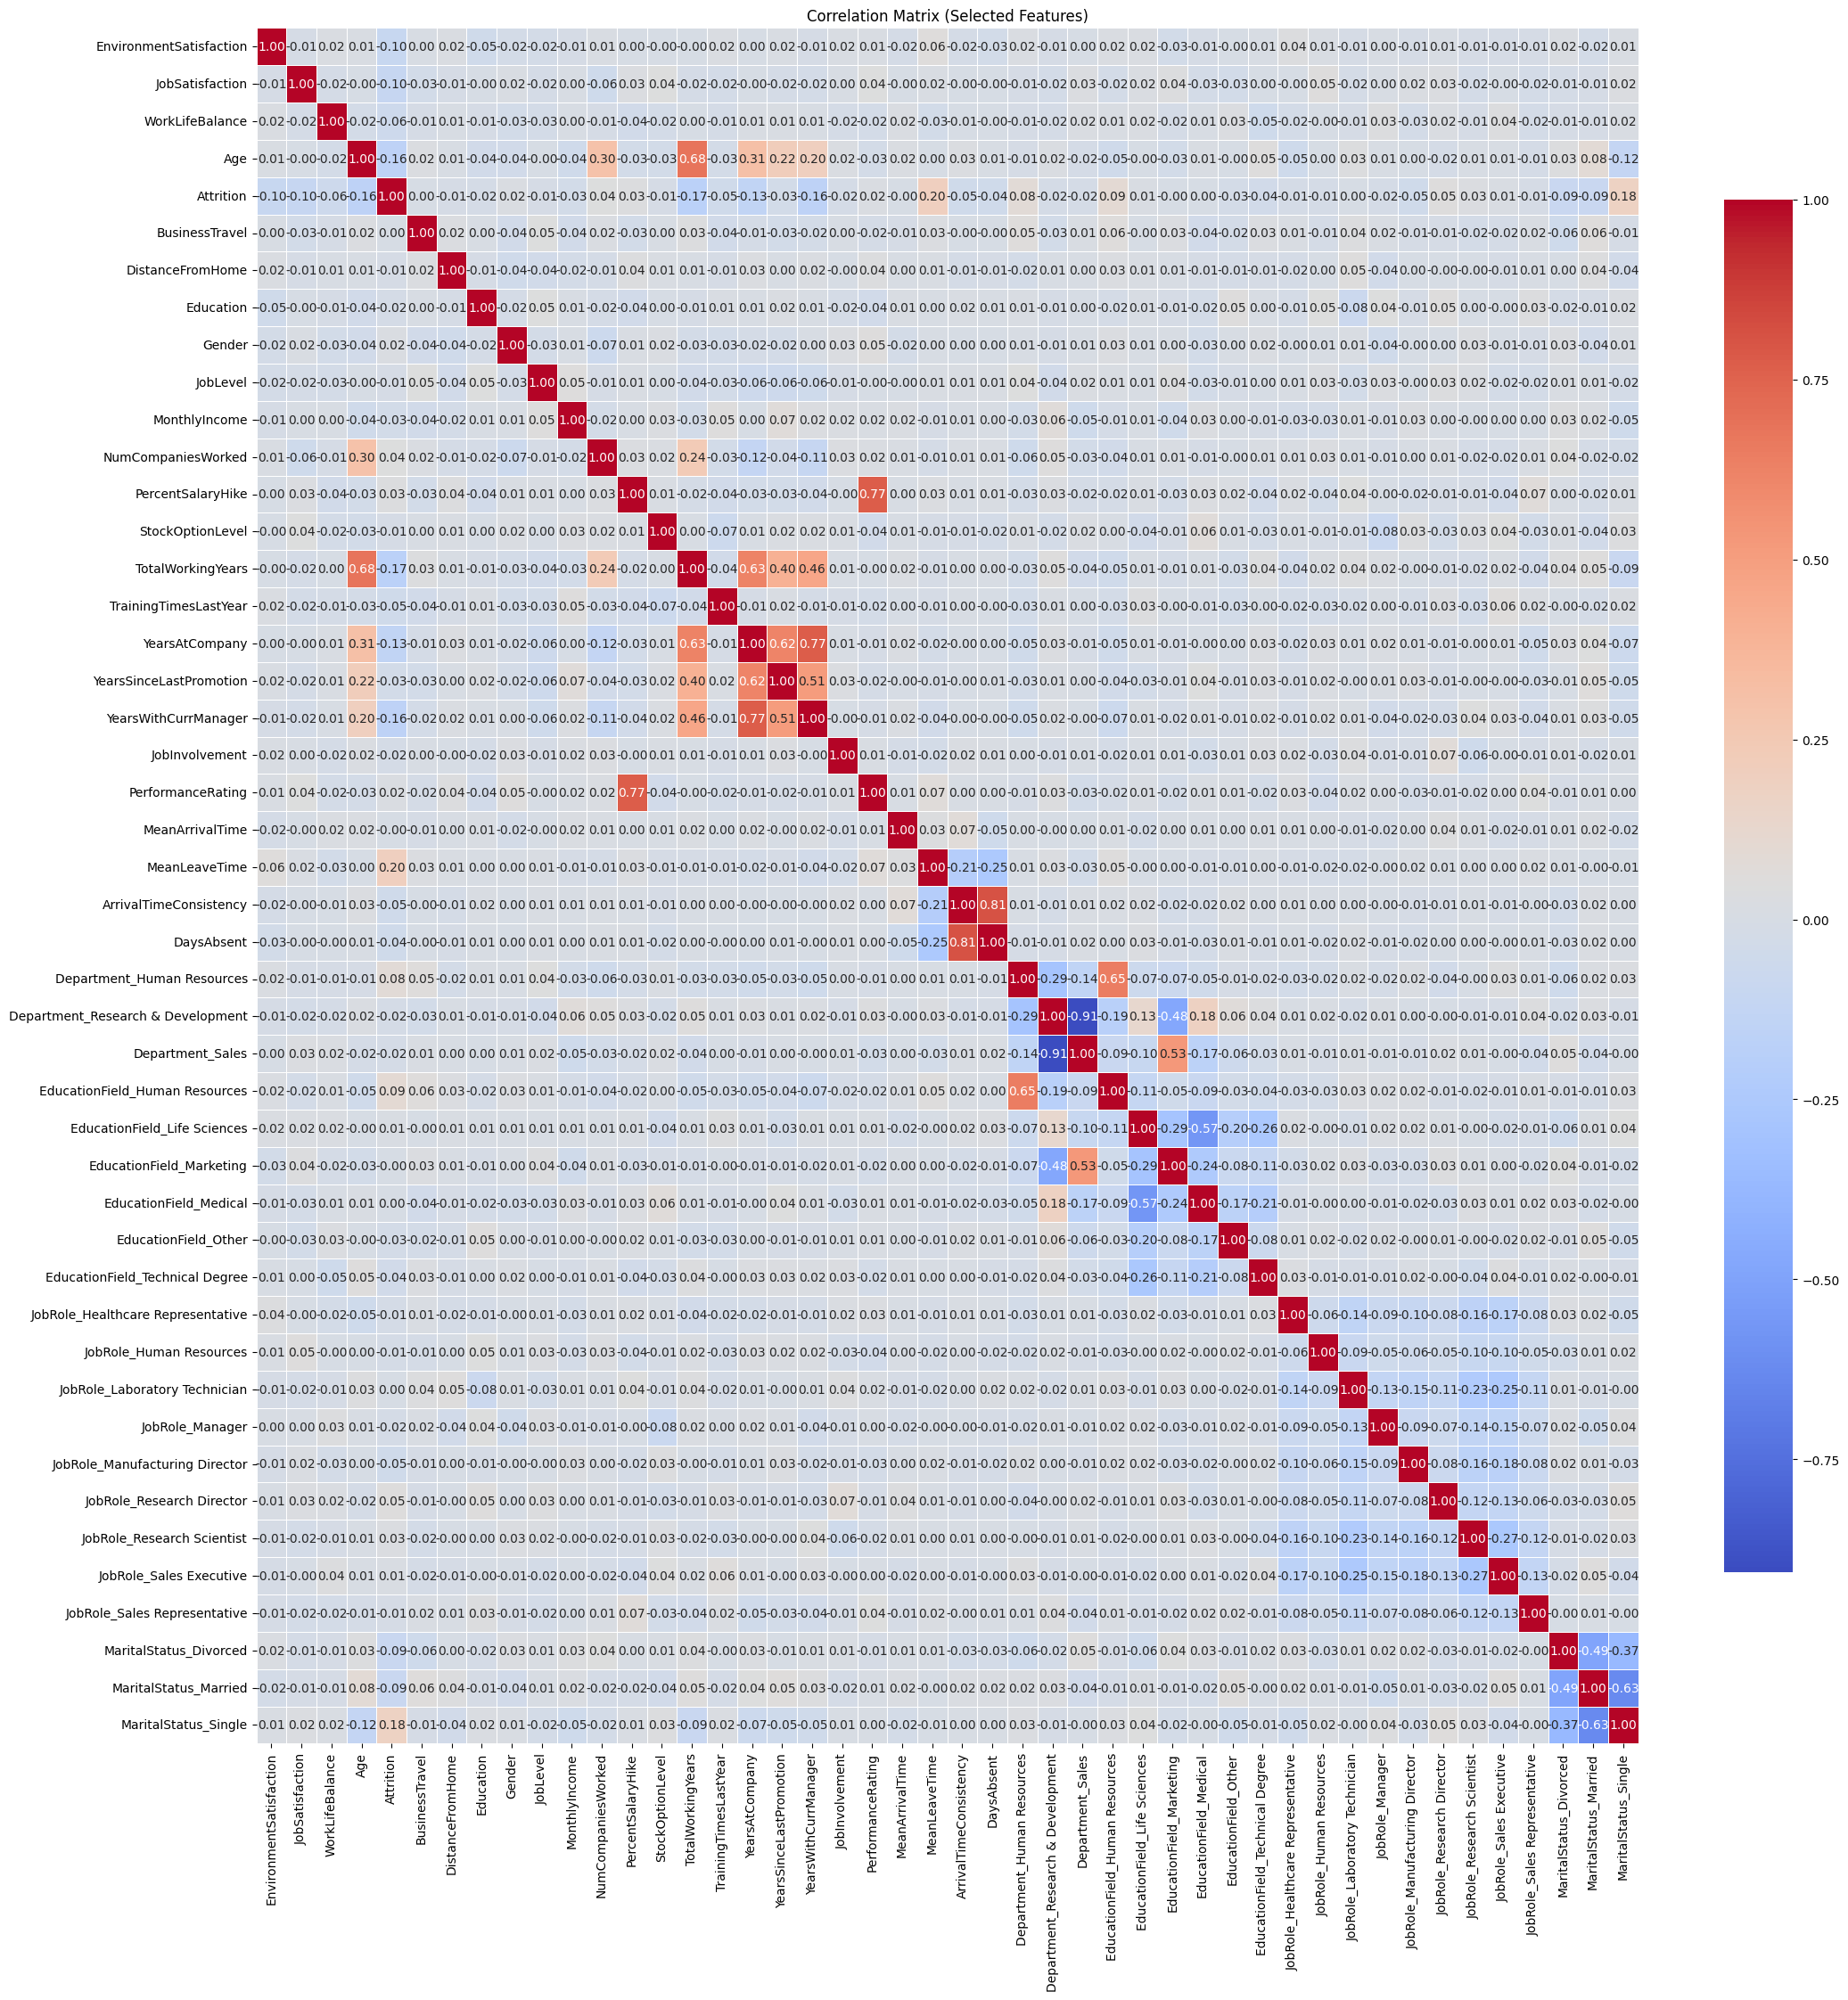

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

plt.figure(figsize=(25, 25))  # Adjust the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix (Selected Features)')
plt.show()

## 3. Machine learning

### 3.1 Model Comparison

In this step, we will compare different models to determine which one is the best for our dataset.

We will then split the data into training and testing sets. We will use 80% of the data for training and 20% for testing.
We will also implement a cross-validation to ensure that our model is robust.

We will compare the following models to determine which one is the best:
- Logistic Regression
- Random Forest
- Support Vector Machine
- Neural Network

To ensure that any hyperparameters are optimized, we will use a grid search to find the best hyperparameters for each model.

We will then compare the models using the accuracy score, the precision score, the recall score, and the F1 score as well as the confusion matrix.

Finally, we will choose the best model based on the results of the comparison.

To eliminate randomness, we will set a random state for each model to 42 but it could be set to anything else as long as it's the same throughot the code.

c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler


Logistic Regression
Accuracy: 0.854119425547997
Precision: 0.5925925925925926
Recall: 0.23076923076923078
F1: 0.33217993079584773


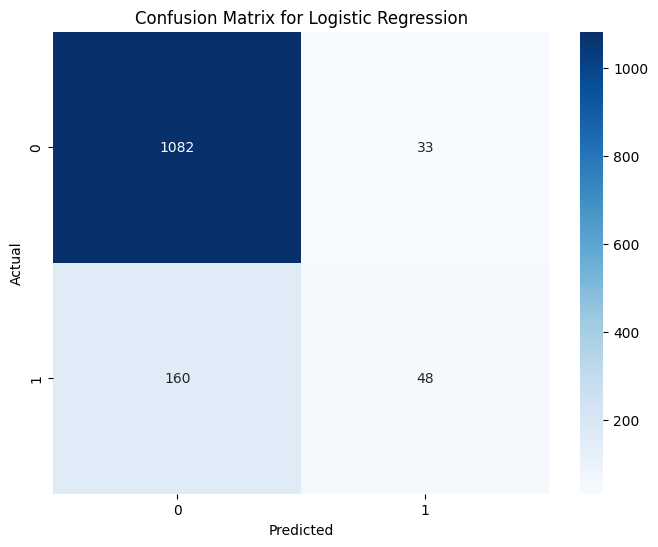


Random Forest
Accuracy: 0.9659863945578231
Precision: 0.9939393939393939
Recall: 0.7884615384615384
F1: 0.8793565683646113


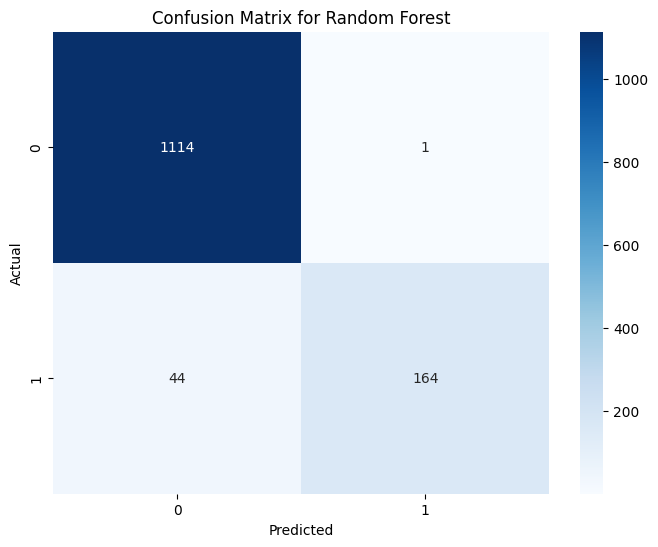


Support Vector Machine
Accuracy: 0.8873771730914588
Precision: 0.9041095890410958
Recall: 0.3173076923076923
F1: 0.4697508896797153


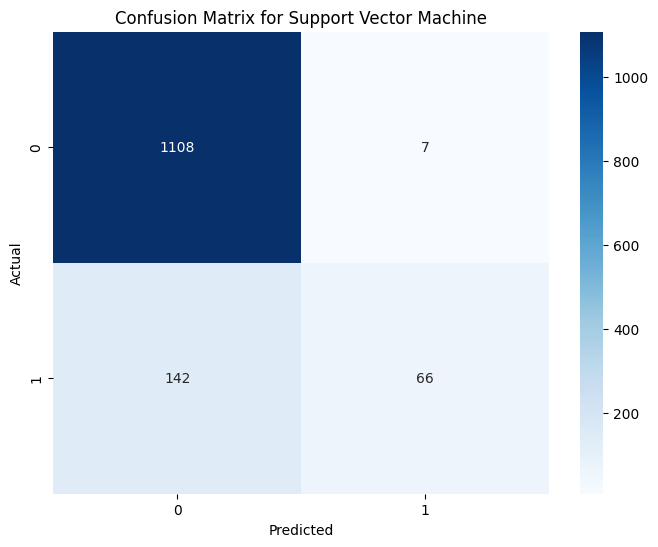


Neural Network
Accuracy: 0.9765684051398337
Precision: 0.9402985074626866
Recall: 0.9086538461538461
F1: 0.9242053789731052


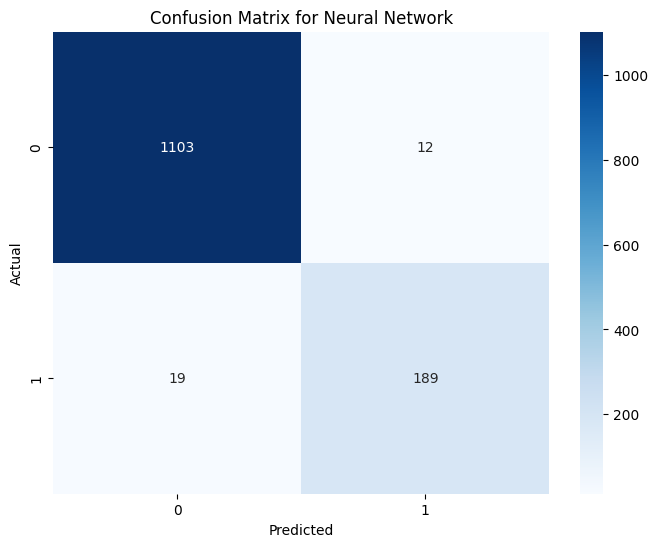

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rState = 42

# Split data into training and testing sets
X = data.drop(columns=['Attrition'])
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rState)

# Logistic Regression
log_reg = LogisticRegression(random_state=rState, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_pred = log_reg.predict(X_test)

# Random Forest
forest = RandomForestClassifier(random_state=rState)
forest.fit(X_train, y_train)
forest_scores = cross_val_score(forest, X_train, y_train, cv=5)
forest_pred = forest.predict(X_test)

# Support Vector Machine
svm = SVC(random_state=rState, max_iter=1000)
svm.fit(X_train, y_train)
svm_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm_pred = svm.predict(X_test)

# Neural Network
nn = MLPClassifier(random_state=rState, max_iter=1000)
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=5)
nn_pred = nn.predict(X_test)

# Calculate the confusion matrix and scores
models = {
    'Logistic Regression': (log_reg, log_reg_pred),
    'Random Forest': (forest, forest_pred),
    'Support Vector Machine': (svm, svm_pred),
    'Neural Network': (nn, nn_pred)
}

for name, (model, pred) in models.items():
    cm = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print(f'\n{name}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### 3.2 Model optimization

In this step, we will optimize the best model to improve its performance.
We will use a grid search to find the best hyperparameters for the model.
We will then compare the model before and after optimization to see if there is an improvement.

Minimizing the numver of false positives is more important than minimizing the number of false negatives in our case because we are trying to predict the employees that are likely to leave the company. It is better to predict that an employee will leave the company and then keep him than to predict that an employee will stay and then lose him.

We will optimize the Random Forest model because it has the best performance in the previous step.

### Random Forest Optimization ###

#### With f1-scoring ####

Best parameters: {'max_depth': 83, 'max_features': 87, 'n_estimators': 331}

Random Forest (Optimized)
Accuracy: 0.9727891156462585
Precision: 0.9526315789473684
Recall: 0.8701923076923077
F1: 0.9095477386934674


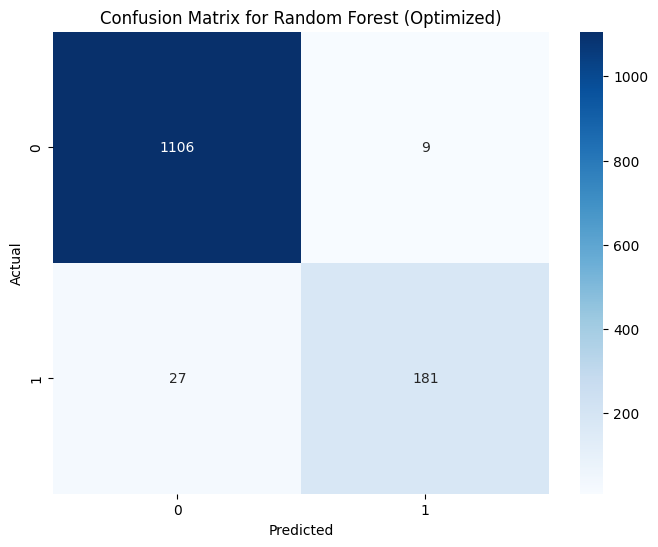

In [13]:
from scipy.stats import randint
import optuna
from sklearn.model_selection import RandomizedSearchCV

# Random Forest optimization
param_distribs = {
    'n_estimators': randint(low=1, high=1000),
    'max_features': randint(low=1, high=100),
    'max_depth': randint(low=1, high=100)
}


random_search = RandomizedSearchCV(
    forest, 
    param_distribs, 
    n_iter=10,  # 100 random iterations
    scoring='f1',  # We use negative MSE for scoring
    cv=5,  # 5-fold cross-validation
    random_state=42, 
    return_train_score=True,
    n_jobs=-1,  # Use all available CPUs for faster computation
)
random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')

forest_optimized = random_search.best_estimator_
forest_optimized.fit(X_train, y_train)
forest_optimized_pred = forest_optimized.predict(X_test)


# Calculate the confusion matrix and scores
cm = confusion_matrix(y_test, forest_optimized_pred)
accuracy = accuracy_score(y_test, forest_optimized_pred)
precision = precision_score(y_test, forest_optimized_pred)
recall = recall_score(y_test, forest_optimized_pred)
f1 = f1_score(y_test, forest_optimized_pred)

print(f'\nRandom Forest (Optimized)')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### With precision scoring ####

Best parameters: {'max_depth': 24, 'max_features': 3, 'n_estimators': 662}

Random Forest (Optimized)
Accuracy: 0.9622071050642479
Precision: 1.0
Recall: 0.7596153846153846
F1: 0.8633879781420765


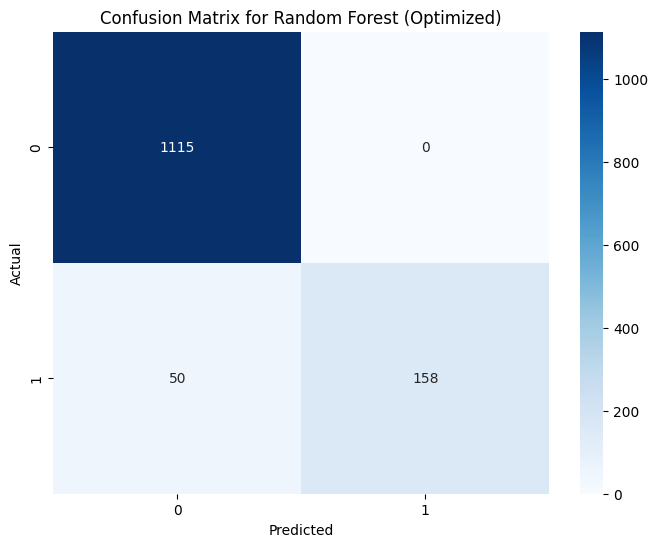

In [14]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Random Forest optimization
param_distribs = {
    'n_estimators': randint(low=1, high=1000),
    'max_features': randint(low=1, high=100),
    'max_depth': randint(low=1, high=100)
}


random_search = RandomizedSearchCV(
    forest, 
    param_distribs, 
    n_iter=10,  # 10 random iterations
    scoring='precision',  # We use negative MSE for scoring
    cv=5,  # 5-fold cross-validation
    random_state=42, 
    return_train_score=True,
    n_jobs=-1,  # Use all available CPUs for faster computation
)
random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')

forest_optimized = random_search.best_estimator_
forest_optimized.fit(X_train, y_train)
forest_optimized_pred = forest_optimized.predict(X_test)


# Calculate the confusion matrix and scores
cm = confusion_matrix(y_test, forest_optimized_pred)
accuracy = accuracy_score(y_test, forest_optimized_pred)
precision = precision_score(y_test, forest_optimized_pred)
recall = recall_score(y_test, forest_optimized_pred)
f1 = f1_score(y_test, forest_optimized_pred)

print(f'\nRandom Forest (Optimized)')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### With recall scoring ####

Best parameters: {'max_depth': 52, 'max_features': 93, 'n_estimators': 271}

Random Forest (Optimized)
Accuracy: 0.9712773998488284
Precision: 0.9521276595744681
Recall: 0.8605769230769231
F1: 0.9040404040404041


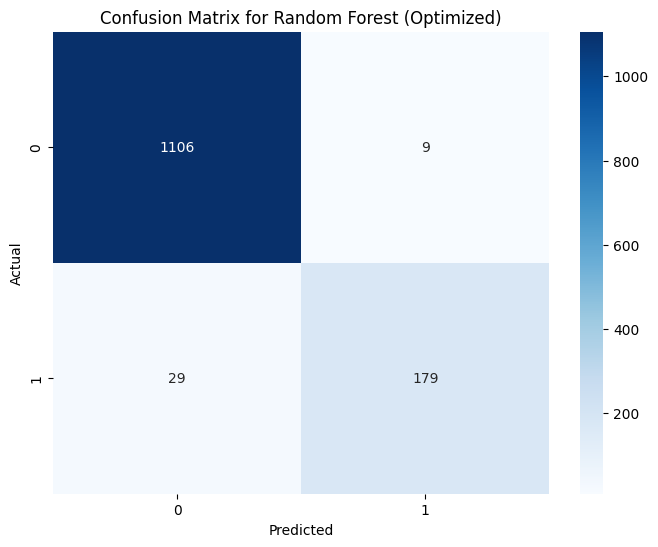

In [15]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Random Forest optimization
param_distribs = {
    'n_estimators': randint(low=1, high=1000),
    'max_features': randint(low=1, high=100),
    'max_depth': randint(low=1, high=100)
}


random_search = RandomizedSearchCV(
    forest, 
    param_distribs, 
    n_iter=10,  # 100 random iterations
    scoring='recall',  # We use negative MSE for scoring
    cv=5,  # 5-fold cross-validation
    random_state=42, 
    return_train_score=True,
    n_jobs=-1,  # Use all available CPUs for faster computation
)
random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')

forest_optimized = random_search.best_estimator_
forest_optimized.fit(X_train, y_train)
forest_optimized_pred = forest_optimized.predict(X_test)


# Calculate the confusion matrix and scores
cm = confusion_matrix(y_test, forest_optimized_pred)
accuracy = accuracy_score(y_test, forest_optimized_pred)
precision = precision_score(y_test, forest_optimized_pred)
recall = recall_score(y_test, forest_optimized_pred)
f1 = f1_score(y_test, forest_optimized_pred)

print(f'\nRandom Forest (Optimized)')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We can see that the recall scoring and the f1 scoring have the same optimization. Compare to the precision scoring, these two model optimization will have a better general result. Whenever the precision of the model will be a little less accurate, this is minimize than the recall diference between the models. So we will use the F1-Score because we reduce the false negative and also we can better estimate the employee their probably leave the enterprise, and also, we have a better anticipation.

#### Better optimization algorithm ####
After the 1st optimization we has seen that we can have a better optimized model. The objective for that is to have RandomSearch that will reduce the search range by always searching around the best results. For this there is a framework called optuma.

[I 2024-12-18 18:38:02,079] A new study created in memory with name: no-name-a566adad-6b4b-443e-9000-0999db47fc34
[I 2024-12-18 18:39:12,632] Trial 0 finished with value: 0.6991377849526227 and parameters: {'n_estimators': 726, 'max_depth': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.6991377849526227.
[I 2024-12-18 18:39:41,922] Trial 1 finished with value: 0.8086553643852223 and parameters: {'n_estimators': 961, 'max_depth': 55, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.8086553643852223.
[I 2024-12-18 18:39:53,847] Trial 2 finished with value: 0.5579903235024245 and parameters: {'n_estimators': 618, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.8086553643852223.
[I 2024-12-18 18:40:52,308] Trial 3 finished with value: 0.7559099874484491 

Best Parameters: {'n_estimators': 848, 'max_depth': 55, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}
Best F1 Score: 0.9011145144603914

Random Forest (Optimized)
Accuracy: 0.9795918367346939
Precision: 1.0
Recall: 0.8701923076923077
F1: 0.9305912596401028


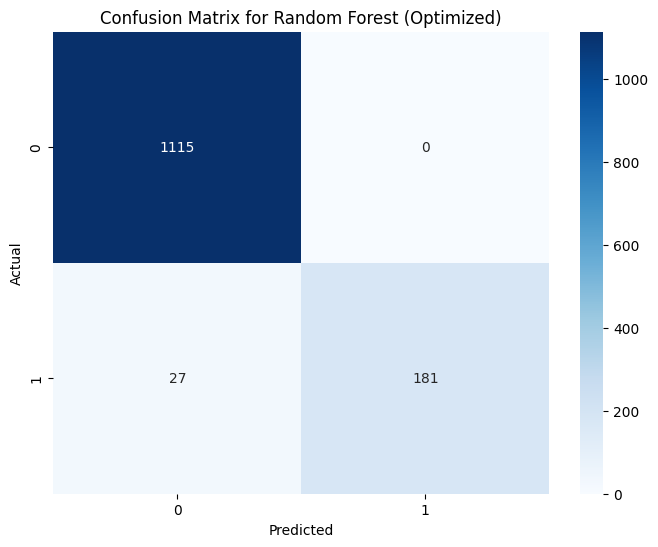

In [16]:
# Finding the best parameters for the Random Forest model (using bayesian optimization)
# Takes 5 - 10 mins to run for 100 trials
import optuna
from sklearn.metrics import make_scorer

# Create a scorer
f1_scorer = make_scorer(f1_score, average='binary')
def objective(trial):
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 10, 110),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }
    rf = RandomForestClassifier(**rf_params, random_state=42)
    f1 = cross_val_score(rf, X_train, y_train, scoring=f1_scorer, cv=5).mean()
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print("Best Parameters:", study.best_params)
print("Best F1 Score:", study.best_value)

forest_optimized = RandomForestClassifier(**study.best_params, random_state=rState)
forest_optimized.fit(X_train, y_train)
forest_optimized_pred = forest_optimized.predict(X_test)

# Calculate the confusion matrix and scores
cm = confusion_matrix(y_test, forest_optimized_pred)
accuracy = accuracy_score(y_test, forest_optimized_pred)
precision = precision_score(y_test, forest_optimized_pred)
recall = recall_score(y_test, forest_optimized_pred)
f1 = f1_score(y_test, forest_optimized_pred)

print(f'\nRandom Forest (Optimized)')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Optimisation of the models ###

We will optimize the diferent models to find which is the better for our AI

#### Grid Search ####

Best parameters: {'max_depth': 20, 'n_estimators': 400}

Random Forest (Optimized)
Accuracy: 0.9667422524565382
Precision: 1.0
Recall: 0.7884615384615384
F1: 0.8817204301075269


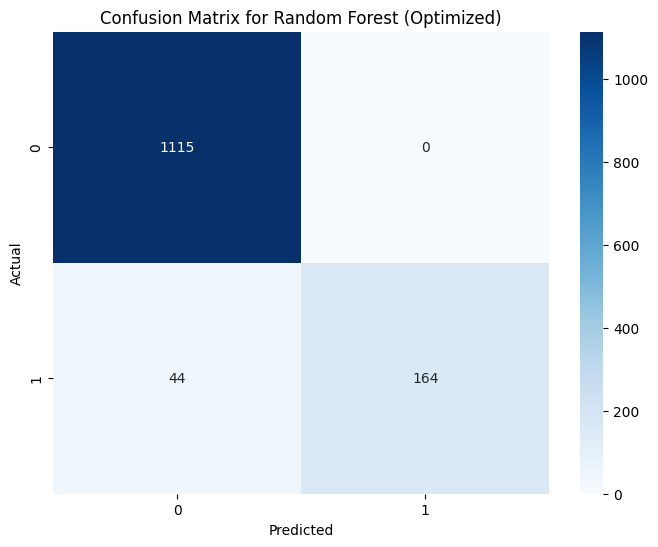

In [17]:
# Random Forest optimization
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, 50],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='precision', return_train_score=True)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

forest_optimized = grid_search.best_estimator_
forest_optimized.fit(X_train, y_train)
forest_optimized_pred = forest_optimized.predict(X_test)

# Calculate the confusion matrix and scores
cm = confusion_matrix(y_test, forest_optimized_pred)
accuracy = accuracy_score(y_test, forest_optimized_pred)
precision = precision_score(y_test, forest_optimized_pred)
recall = recall_score(y_test, forest_optimized_pred)
f1 = f1_score(y_test, forest_optimized_pred)

print(f'\nRandom Forest (Optimized)')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best parameters: {'max_depth': 20, 'n_estimators': 400}

Random Forest (Optimized)
Accuracy: 0.9667422524565382
Precision: 1.0
Recall: 0.7884615384615384
F1: 0.8817204301075269


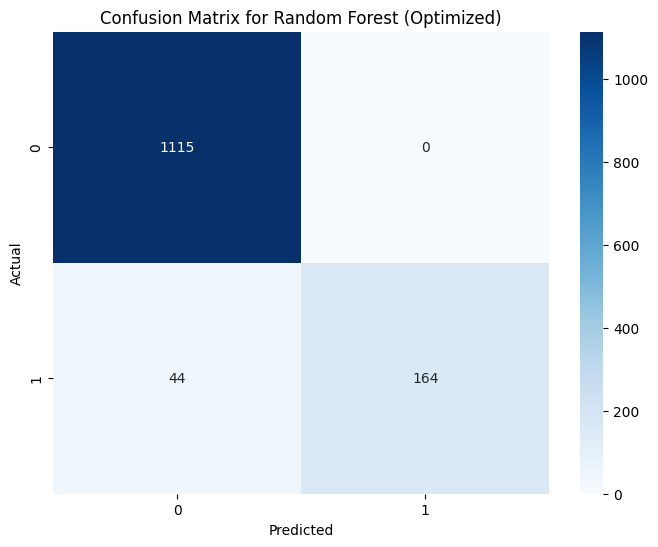

In [18]:
# Random Forest optimization
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, 50],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

forest_optimized = grid_search.best_estimator_
forest_optimized.fit(X_train, y_train)
forest_optimized_pred = forest_optimized.predict(X_test)

# Calculate the confusion matrix and scores
cm = confusion_matrix(y_test, forest_optimized_pred)
accuracy = accuracy_score(y_test, forest_optimized_pred)
precision = precision_score(y_test, forest_optimized_pred)
recall = recall_score(y_test, forest_optimized_pred)
f1 = f1_score(y_test, forest_optimized_pred)

print(f'\nRandom Forest (Optimized)')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Neuronal Network model ###

Best parameters: {'max_depth': 52, 'max_features': 93, 'n_estimators': 271}

Neuronal Network (Optimized)
Accuracy: 0.9712773998488284
Precision: 0.9521276595744681
Recall: 0.8605769230769231
F1: 0.9040404040404041


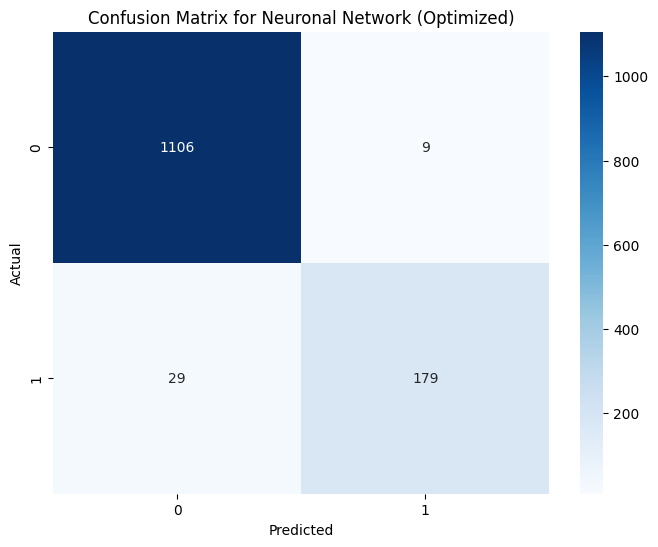

In [19]:
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Neuronal optimization
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 100), (200,200)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': uniform(1e-5, 1e-1),  # Plage entre 1e-5 et 1e-1
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': uniform(1e-4, 1e-2),
    'batch_size': [32, 64, 128, 'auto']
}


random_search_nn = RandomizedSearchCV(
    nn, 
    param_distributions, 
    n_iter=10,  # 100 random iterations
    scoring='f1',  # We use negative MSE for scoring
    cv=5,  # 5-fold cross-validation
    random_state=42, 
    return_train_score=True,
    n_jobs=-1,  # Use all available CPUs for faster computation
)
random_search_nn.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')

forest_optimized = random_search.best_estimator_
forest_optimized.fit(X_train, y_train)
forest_optimized_pred = forest_optimized.predict(X_test)

# Calculate the confusion matrix and scores
cm = confusion_matrix(y_test, forest_optimized_pred)
accuracy = accuracy_score(y_test, forest_optimized_pred)
precision = precision_score(y_test, forest_optimized_pred)
recall = recall_score(y_test, forest_optimized_pred)
f1 = f1_score(y_test, forest_optimized_pred)

print(f'\nNeuronal Network (Optimized)')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Neuronal Network (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Precision scoring ####

Best parameters: {'max_depth': 52, 'max_features': 93, 'n_estimators': 271}

Neuronal Network (Optimized)
Accuracy: 0.9712773998488284
Precision: 0.9521276595744681
Recall: 0.8605769230769231
F1: 0.9040404040404041


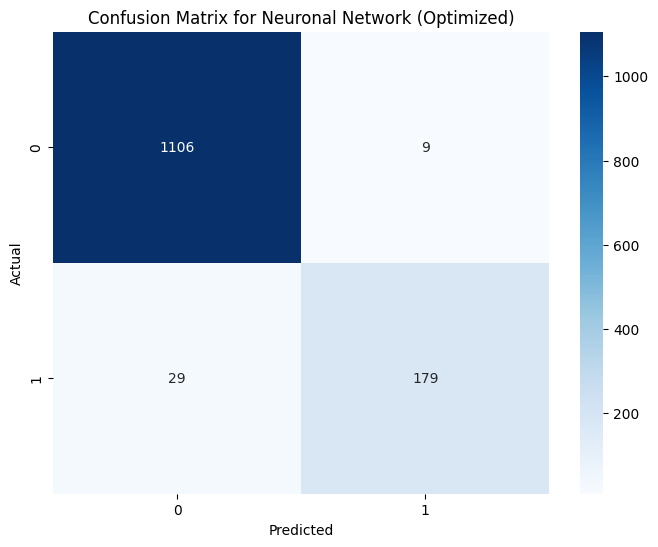

In [20]:
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Neuronal optimization
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 100), (200,200)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': uniform(1e-5, 1e-1),  # Plage entre 1e-5 et 1e-1
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': uniform(1e-4, 1e-2),
    'batch_size': [32, 64, 128, 'auto']
}


random_search_nn = RandomizedSearchCV(
    nn, 
    param_distributions, 
    n_iter=10,  # 100 random iterations
    scoring='precision',  # We use negative MSE for scoring
    cv=5,  # 5-fold cross-validation
    random_state=42, 
    return_train_score=True,
    n_jobs=-1,  # Use all available CPUs for faster computation
)
random_search_nn.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')

forest_optimized = random_search.best_estimator_
forest_optimized.fit(X_train, y_train)
forest_optimized_pred = forest_optimized.predict(X_test)

# Calculate the confusion matrix and scores
cm = confusion_matrix(y_test, forest_optimized_pred)
accuracy = accuracy_score(y_test, forest_optimized_pred)
precision = precision_score(y_test, forest_optimized_pred)
recall = recall_score(y_test, forest_optimized_pred)
f1 = f1_score(y_test, forest_optimized_pred)

print(f'\nNeuronal Network (Optimized)')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Neuronal Network (Optimized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que votre DataFrame initial est appelé 'data'
# Il contient les colonnes 'EmployeeID', 'JobRole', et les données utilisées pour l'entraînement
# Les prédictions sont dans forest_optimized_pred (array de 0 et 1)
print(len(forest_optimized_pred))
# Ajouter les prédictions au DataFrame
data['PredictedAttrition'] = forest_optimized_pred

# Filtrer les employés prédits comme quittant l'entreprise
predicted_leavers = data[data['PredictedAttrition'] == 1]

# Compter les départs prédits par rôle
leavers_by_role = predicted_leavers.groupby('JobRole')['EmployeeID'].count()

# Afficher les résultats
print(leavers_by_role)

# Visualiser avec un graphique
plt.figure(figsize=(10, 6))
leavers_by_role.sort_values().plot(kind='bar', color='salmon')
plt.title('Nombre de départs prédits par rôle dans l\'entreprise')
plt.xlabel('Rôle')
plt.ylabel('Nombre de départs prédits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


1323


ValueError: Length of values (1323) does not match length of index (4410)